<a href="https://colab.research.google.com/github/2sneha5/2sneha5.github.io/blob/master/Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt

%matplotlib inline 
 
import datetime as dt 
from datetime import timedelta 

import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from google.colab import files
dataset_file_dict = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [5]:
test = pd.read_csv("test.csv", parse_dates = ['week'])

In [6]:
sample_submission = pd.read_csv("sample_submission.csv")

In [7]:
train=pd.read_csv("train.csv")

#EDA


# New Section

In [8]:
train=train.dropna()
test=test.dropna()

In [9]:
train.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000
mean,106270.971795,9199.420935,254761.195226,206.626751,219.424262,0.095612,0.133201,51.674543
std,61385.825580,615.593192,85547.587866,103.308516,110.960204,0.294059,0.339793,60.207962
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.000000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.000000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.000000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [10]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [11]:
train.shape

(150149, 9)

In [12]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [13]:
train.corr()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
record_ID,1.000000,0.007461,-0.000476,0.008473,0.018911,0.031361,0.020432,-0.010608
store_id,0.007461,1.000000,-0.068628,-0.038315,-0.038855,-0.008729,0.013441,-0.004369
sku_id,-0.000476,-0.068628,1.000000,0.119332,0.119071,-0.022255,0.014910,-0.184381
total_price,0.008473,-0.038315,0.119332,1.000000,0.958885,0.050354,-0.065930,-0.235625
base_price,0.018911,-0.038855,0.119071,0.958885,1.000000,0.214341,0.051916,-0.140022
is_featured_sku,0.031361,-0.008729,-0.022255,0.050354,0.214341,1.000000,0.426242,0.337750
is_display_sku,0.020432,0.013441,0.014910,-0.065930,0.051916,0.426242,1.000000,0.362661
units_sold,-0.010608,-0.004369,-0.184381,-0.235625,-0.140022,0.337750,0.362661,1.000000


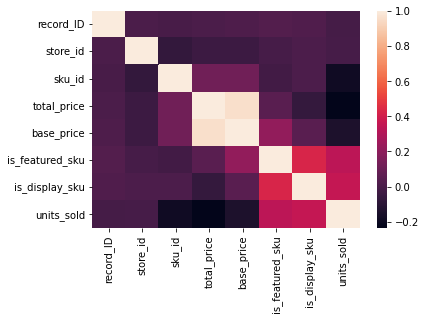

In [14]:
sns.heatmap(train.corr())

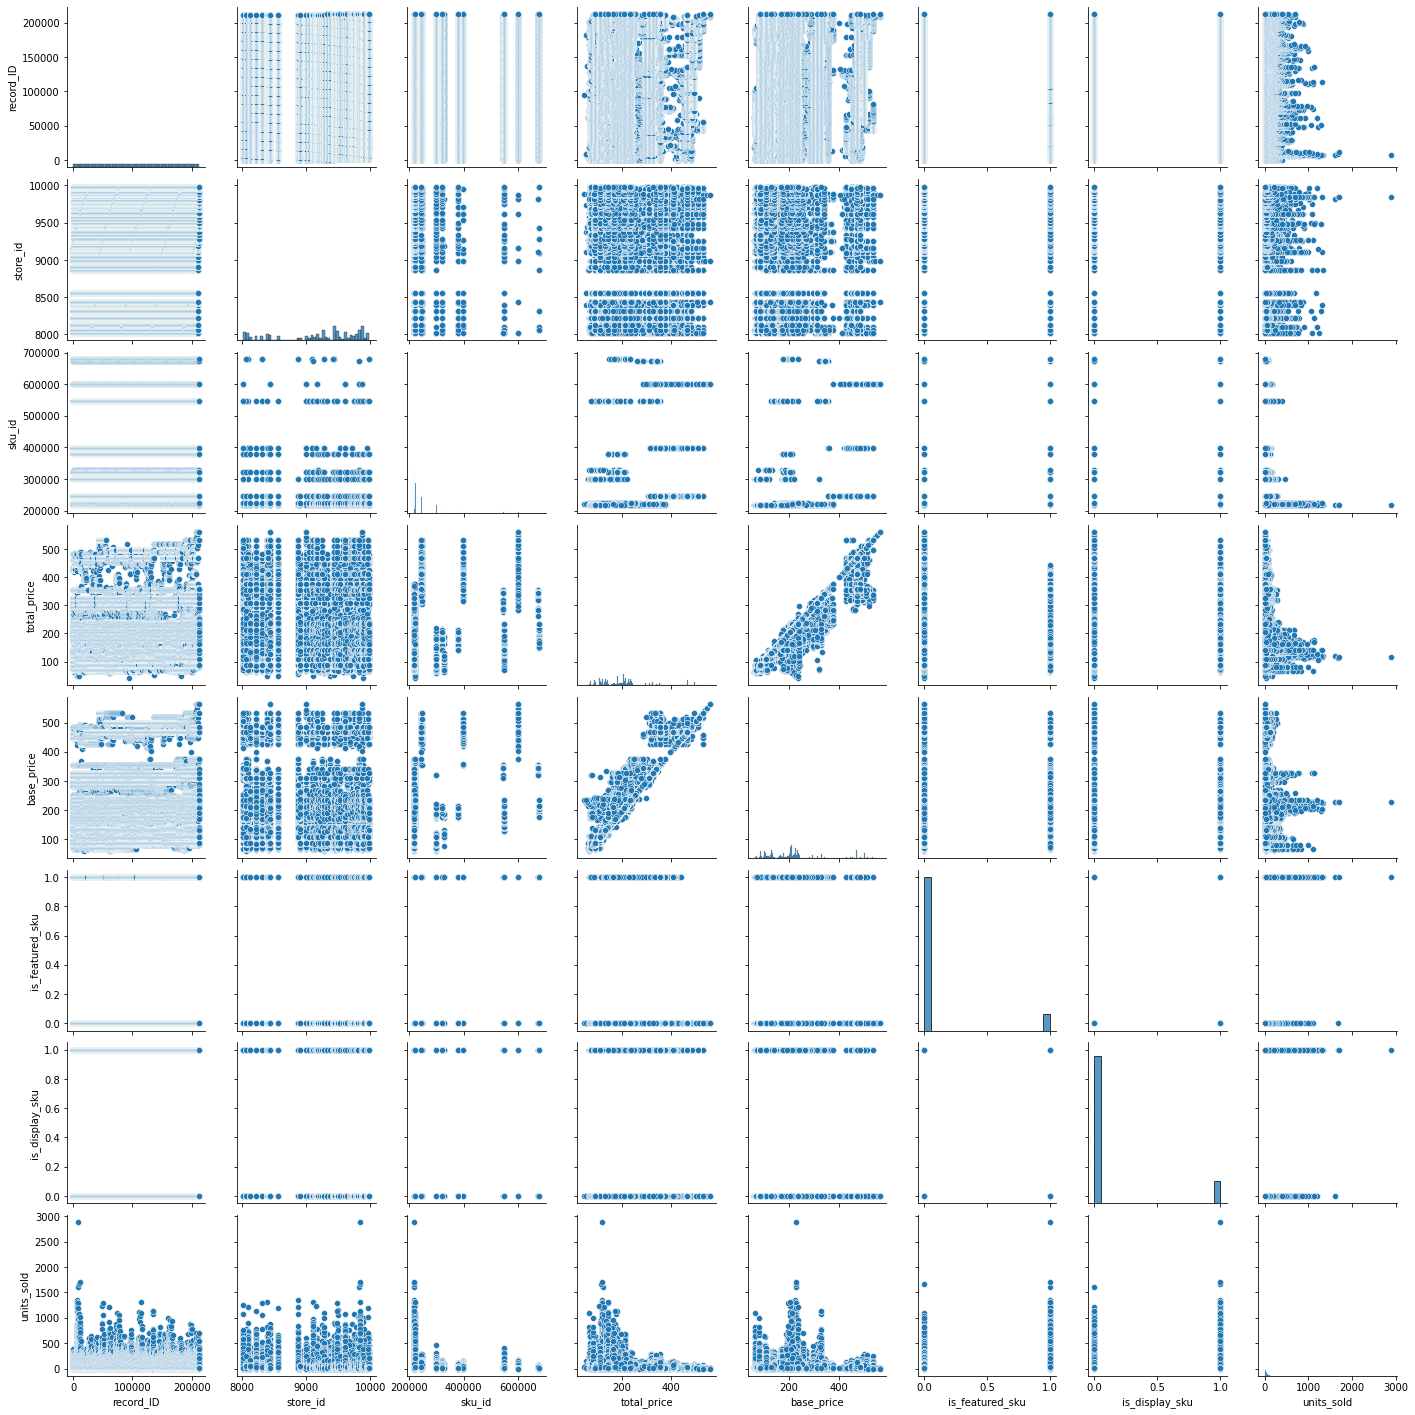

In [15]:
sns.pairplot(train)

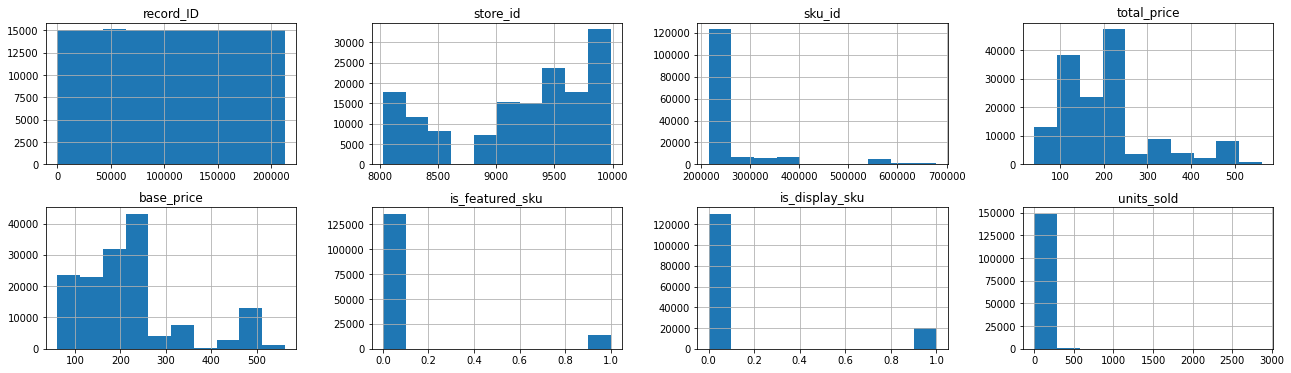

In [16]:
numerical = train._get_numeric_data().columns.tolist()
train[numerical].hist( figsize=(22, 6), layout=(2, 4));

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 <a list of 76 Text major ticklabel objects>)

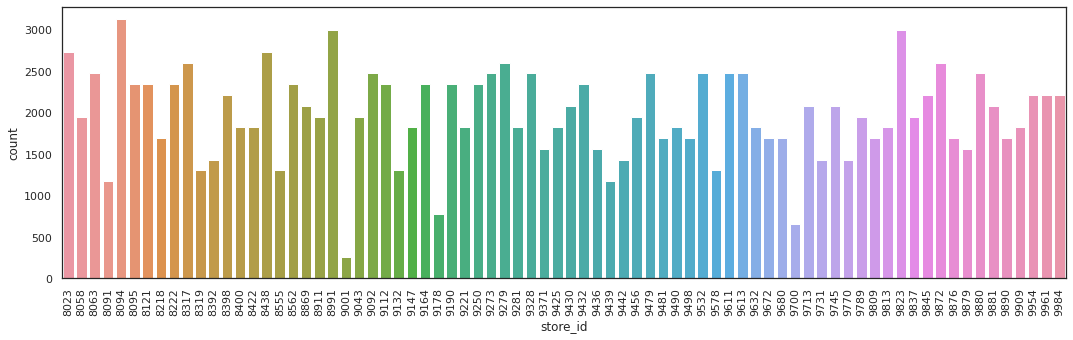

In [17]:
color = sns.color_palette("hls", 9)
sns.set(style="white")
plt.figure(figsize=(18, 5))
sns.countplot(x=train['store_id'], data=train)
plt.xticks(rotation=90)

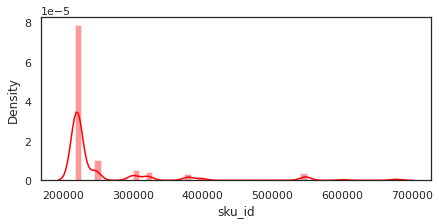

In [18]:
plt.figure(figsize=(7, 3))
sns.distplot(train['sku_id'], color="red");

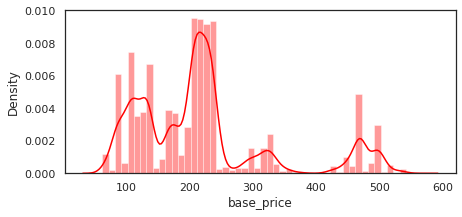

In [19]:
plt.figure(figsize=(7, 3))
sns.distplot(train['base_price'], color="red");

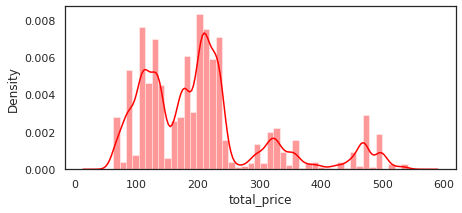

In [20]:
plt.figure(figsize=(7, 3))
sns.distplot(train['total_price'], color="red");

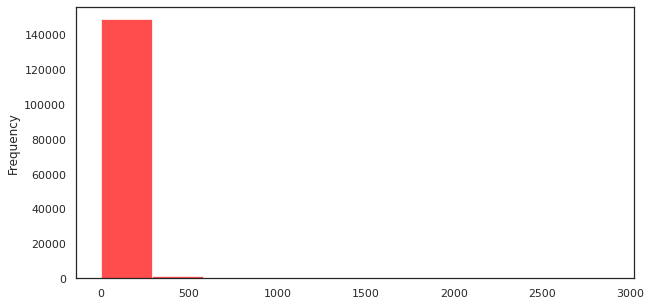

In [21]:
plt.figure(figsize=(10, 5))
train['units_sold'].plot(kind='hist', alpha=0.7, color='red')

In [22]:
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,2013-07-16,8091,216418,108.3000,108.3000,0,0
1,212646,2013-07-16,8091,216419,109.0125,109.0125,0,0
2,212647,2013-07-16,8091,216425,133.9500,133.9500,0,0
3,212648,2013-07-16,8091,216233,133.9500,133.9500,0,0
4,212649,2013-07-16,8091,217390,176.7000,176.7000,0,0


In [23]:
test.shape

(13860, 8)

In [24]:
len(test['store_id'].unique())

76

In [25]:
len(test['sku_id'].unique())

28

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 <a list of 76 Text major ticklabel objects>)

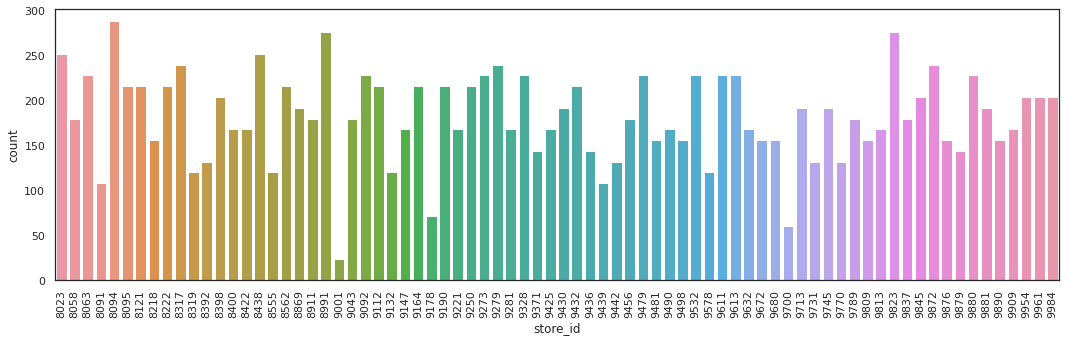

In [26]:
plt.figure(figsize=(18, 5))
sns.countplot(x=test['store_id'], data=test)
plt.xticks(rotation=90)

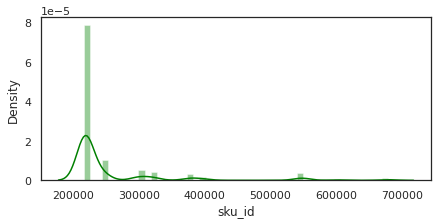

In [27]:
plt.figure(figsize=(7, 3))
sns.distplot(test['sku_id'], color="green");

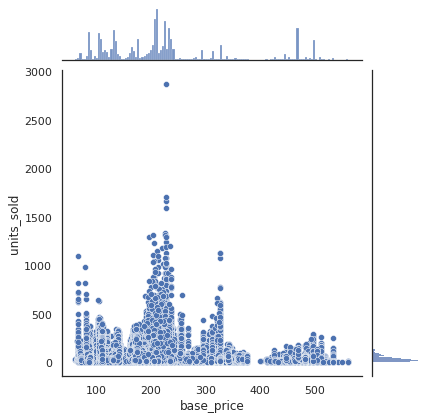

In [28]:
sns.jointplot(x=train['base_price'], y=train['units_sold']);

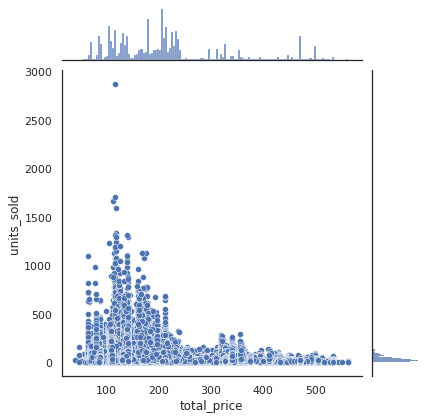

In [29]:
sns.jointplot(x=train['total_price'], y=train['units_sold']);

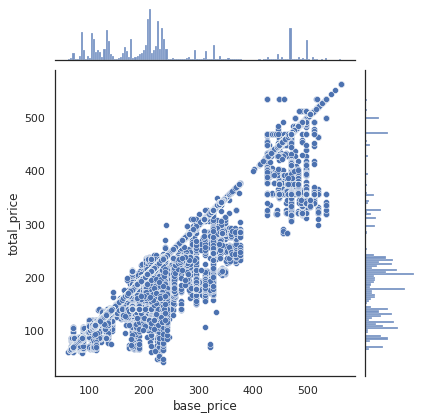

In [30]:
sns.jointplot(x=train['base_price'], y=train['total_price']);

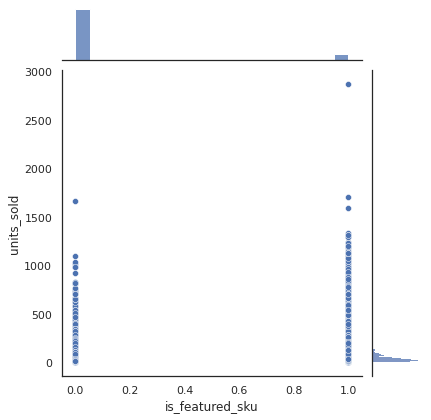

In [31]:
sns.jointplot(x=train['is_featured_sku'], y=train['units_sold']);

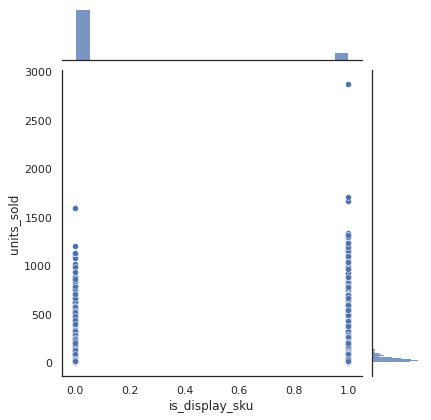

In [32]:
sns.jointplot(x=train['is_display_sku'], y=train['units_sold']);

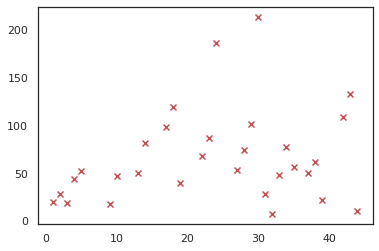

In [33]:
x = train.iloc[0:30,[0]]
y = train.iloc[0:30,[8]]

plt.scatter(x, y, marker='x', c='r')
plt.show()

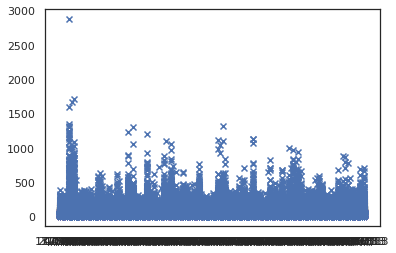

In [34]:
plt.scatter(train['week'], train['units_sold'], marker='x')
plt.show()

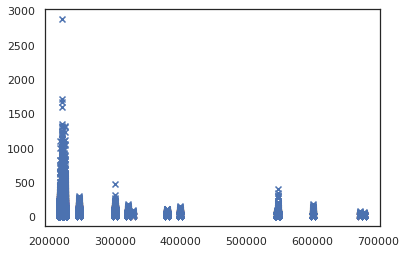

In [35]:
plt.scatter(train['sku_id'], train['units_sold'], marker='x')
plt.show()

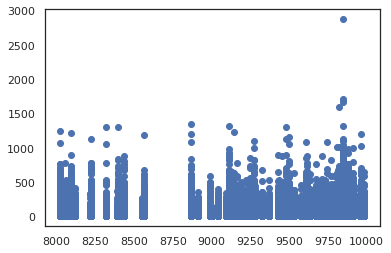

In [36]:
plt.scatter(train['store_id'], train['units_sold'])
plt.show()

In [37]:
train_copy=train.copy()
train_copy=train_copy.dropna()
train_copy['time']=1

In [38]:
train_copy.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,time
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,1
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,1
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,1
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,1
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,1


In [39]:
train_copy.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,time
count,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.0
mean,106270.971795,9199.420935,254761.195226,206.626751,219.424262,0.095612,0.133201,51.674543,1.0
std,61385.825580,615.593192,85547.587866,103.308516,110.960204,0.294059,0.339793,60.207962,0.0
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000,1.0
25%,53111.000000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000,1.0
50%,106226.000000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000,1.0
75%,159452.000000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000,1.0
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000,1.0


In [40]:

X = train_copy.iloc[:,[0,2,3,4,5,6,7,9]]
y = train_copy.iloc[:,8]
X.head()



,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,time
0,1,8091,216418,99.0375,111.8625,0,0,1
1,2,8091,216419,99.0375,99.0375,0,0,1
2,3,8091,216425,133.9500,133.9500,0,0,1
3,4,8091,216233,133.9500,133.9500,0,0,1
4,5,8091,217390,141.0750,141.0750,0,0,1


In [41]:
y.head(100)

0      20
1      28
2      19
3      44
4      52
     ... 
95     82
96     84
97     51
98     24
99    173
Name: units_sold, Length: 100, dtype: int64

In [42]:
test['time']=12
linear_regg= LinearRegression()
linear_regg.fit(X,y)
LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)


LinearRegression(normalize=False)

In [43]:
coeff_df = pd.DataFrame(linear_regg.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
record_ID,-0.000023
store_id,-0.002356
sku_id,-0.000114
total_price,-0.326783
base_price,0.197759
is_featured_sku,38.194959
is_display_sku,40.836818
time,0.000000


In [44]:
X_test=test.iloc[:,[0,2,3,4,5,6,7,8]]
X_test.head()


,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,time
0,212645,8091,216418,108.3000,108.3000,0,0,12
1,212646,8091,216419,109.0125,109.0125,0,0,12
2,212647,8091,216425,133.9500,133.9500,0,0,12
3,212648,8091,216233,133.9500,133.9500,0,0,12
4,212649,8091,217390,176.7000,176.7000,0,0,12


In [45]:
y_pred=linear_regg.predict(X_test)
y_pred


array([ 57.29646325,  57.20439662,  53.98614118, ...,  96.53819371,
         3.87809297, -16.56680286])

In [46]:
Y_PRED=pd.DataFrame(y_pred,index=test['record_ID'])
Y_PRED.rename(columns={0 : 'units_sold'})
Y_PRED[Y_PRED[0]<0]=0
Y_PRED

,0
record_ID,
212645,57.296463
212646,57.204397
212647,53.986141
212648,54.007984
212649,48.360398
...,...
232281,34.420323
232282,34.522708
232285,96.538194


In [47]:
from google.colab import files

Y_PRED.to_csv('Y_PRED.csv')
files.download('Y_PRED.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
y_train_pred=linear_regg.predict(X)
y_train_pred=pd.DataFrame(y_train_pred)
y_train_pred.head()

,0
0,65.867683
1,63.331291
2,58.826016
3,58.847859
4,57.796772


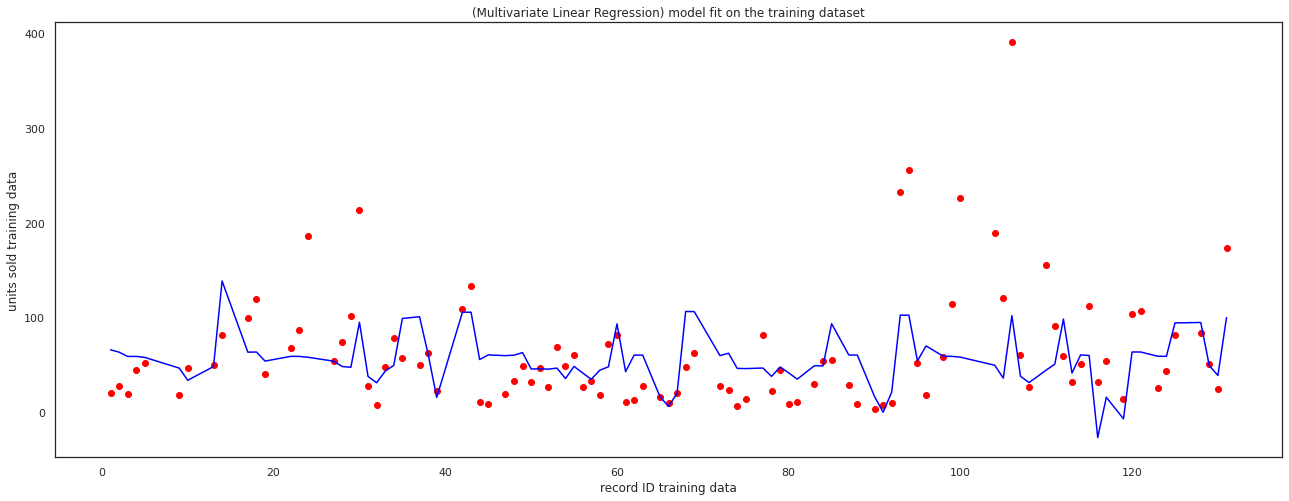

In [49]:
plt.figure(figsize=(22,8))
plt.scatter(train.iloc[0:100,0], train.iloc[0:100,8], color='red')
plt.plot(train.iloc[0:100,0],y_train_pred.iloc[0:100,0], color='blue')
plt.title('(Multivariate Linear Regression) model fit on the training dataset')
plt.xlabel('record ID training data')
plt.ylabel('units sold training data')
plt.show()

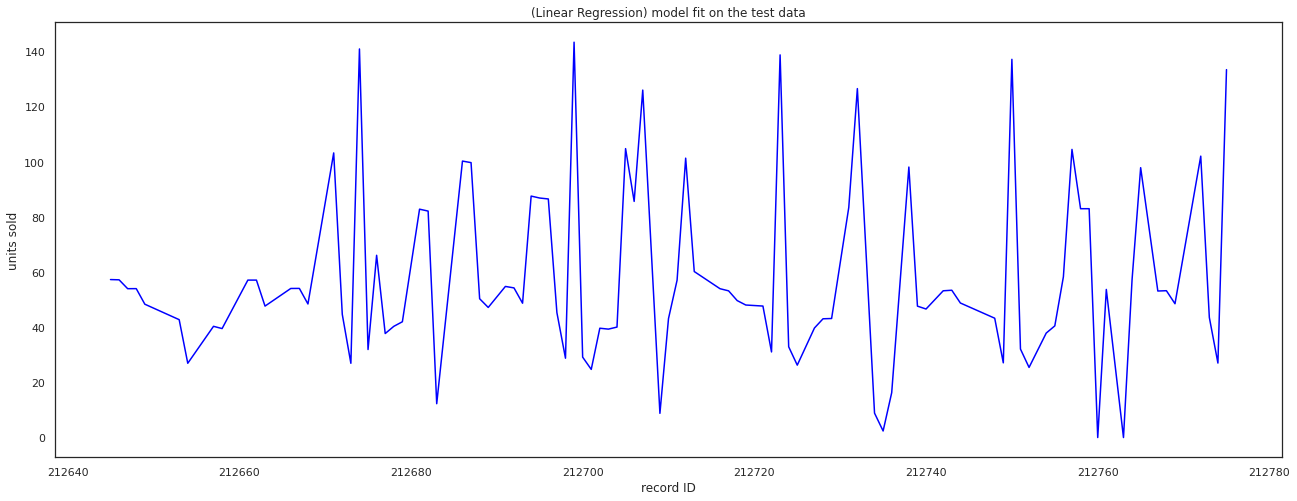

In [50]:
#plt.scatter(train.iloc[0:100,0], train.iloc[0:100,8], color='red')
plt.figure(figsize=(22,8))
plt.plot(test.iloc[0:100,0],Y_PRED.iloc[0:100,0], color='blue')
plt.title('(Linear Regression) model fit on the test data')
plt.xlabel('record ID')
plt.ylabel('units sold')
plt.show()

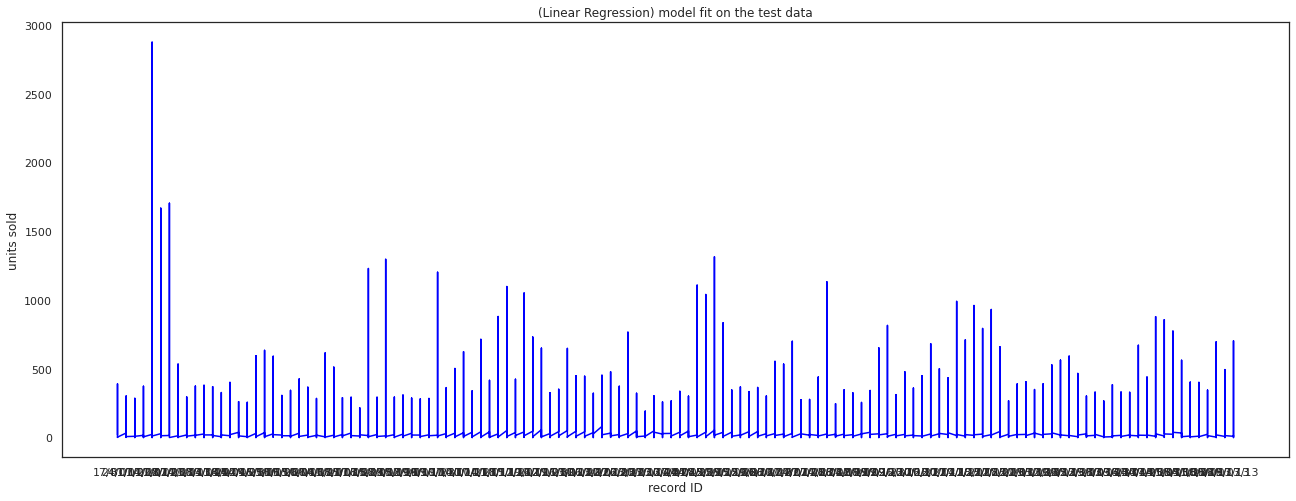

In [51]:
#plt.scatter(train.iloc[0:100,0], train.iloc[0:100,8], color='red')
plt.figure(figsize=(22,8))
plt.plot(train['week'],train['units_sold'], color='blue')
plt.title('(Linear Regression) model fit on the test data')
plt.xlabel('record ID')
plt.ylabel('units sold')
plt.show()

In [52]:
theta=coeff_df['Coefficient']
theta


record_ID          -0.000023
store_id           -0.002356
sku_id             -0.000114
total_price        -0.326783
base_price          0.197759
is_featured_sku    38.194959
is_display_sku     40.836818
time                0.000000
Name: Coefficient, dtype: float64

In [53]:
Y_PRED.describe()

,0
count,13860.000000
mean,48.097402
std,27.353371
min,0.000000
25%,33.531805
50%,43.291422
75%,55.167714
max,152.762173


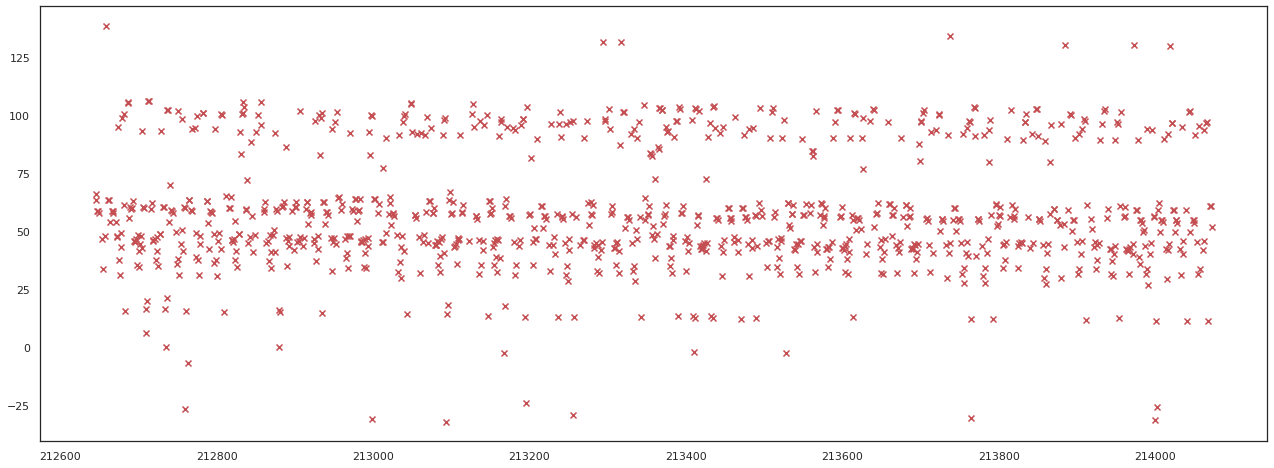

In [70]:
x = test['record_ID'].head(1000)
y = Y_PRED.iloc[0:1000,[0]]
plt.figure(figsize=(22,8))
plt.scatter(x, y, marker='x', c='r')
plt.show()

In [55]:
y_pred=linear_regg.predict(X)
y_pred

array([ 65.86768261,  63.33129126,  58.82601607, ..., 121.33828268,
        61.46030651, -16.11971918])

In [66]:
Y_PRED=pd.DataFrame(y_pred,index=train_copy['record_ID'])
Y_PRED.rename(columns={0 : 'units_sold'})
Y_PRED

,0
record_ID,
1,65.867683
2,63.331291
3,58.826016
4,58.847859
5,57.796772
...,...
212638,35.602847
212639,35.613301
212642,121.338283


In [67]:
Y_PRED.describe()

,0
count,150149.000000
mean,51.674543
std,30.573633
min,-49.246047
25%,37.955568
50%,47.123391
75%,58.616392
max,185.741481


In [68]:
Y_PRED.head()

,0
record_ID,
1,65.867683
2,63.331291
3,58.826016
4,58.847859
5,57.796772


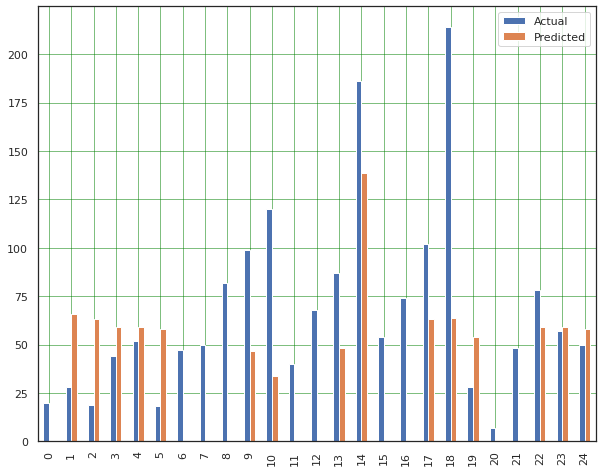

In [69]:
df = pd.DataFrame({'Actual': train_copy['units_sold'], 'Predicted': Y_PRED[0]})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [80]:
df1

,Actual,Predicted
0,20.0,NaN
1,28.0,65.867683
2,19.0,63.331291
3,44.0,58.826016
4,52.0,58.847859
5,18.0,57.796772
6,47.0,NaN
7,50.0,NaN
8,82.0,NaN
9,99.0,46.488773
